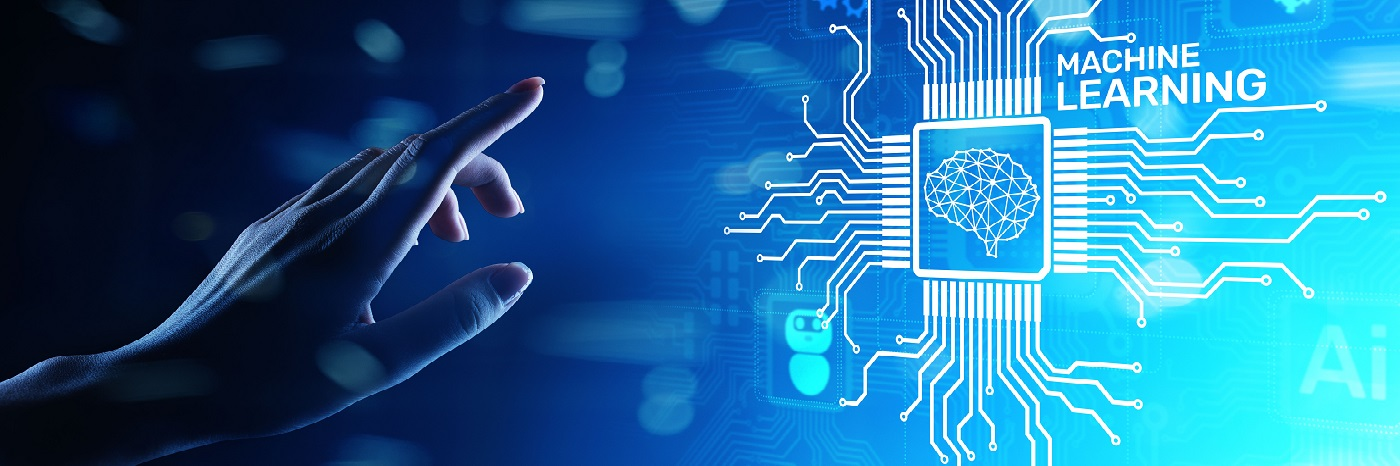

## *Section 1:*
#### Question 1:

In [1]:
#Question 1:
def base_10(x):
    hex_value = hex(x)
    bin_value = bin(x)
    oct_value = oct(x)
    return print('Hexadecimal value is: {}, Binary value is: {}, Octal value is: {}'.format(hex_value, bin_value, oct_value))

## *Section 2:*
#### Question 1:

In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#load the data
cast = pd.read_csv('D:\cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [4]:
#The Question is: How many movies have the title "Hamlet"?
#Using groupby function to get the size of "Hamlet".
cast.groupby('title').size()['Hamlet']

299

#### Question 2:

In [5]:
#The Question is: List all of the "Treasure Island" movies from earliest to most recent.
#geting focus of the relevent title in movies with sorted the year by ealiest to recent.
earliest_to_recent = cast[cast['title'].eq('Treasure Island')].filter(items=['title', 'year']).sort_values(by='year')
earliest_to_recent

,title,year
1312766,Treasure Island,1918
3280557,Treasure Island,1918
3046750,Treasure Island,1918
1167783,Treasure Island,1918
1195421,Treasure Island,1918
...,...,...
1663860,Treasure Island,1999
1731182,Treasure Island,1999
1813707,Treasure Island,1999
2710458,Treasure Island,1999


#### Question 3:

In [10]:
#The Question is: How many roles were credited in the silent 1921 version of Hamlet?

len(cast[(cast.year == 1921) & (cast.title == "Hamlet")])

9

#### Question 4:

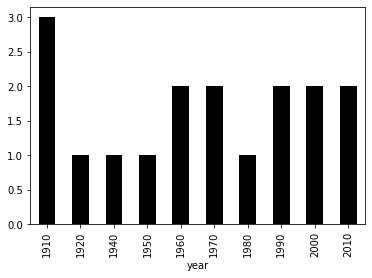

In [11]:
#The Question is: Use groupby() to plot the number of "Hamlet" films made each decade

#if needed unique values
movies_named_hamlet = cast[(cast['title']=="Hamlet")] #took initail data frame and made new that only hamlet movies
hamelet_unique = movies_named_hamlet.groupby('year')['year'].nunique().sort_values(ascending=False).reset_index(name='index')#then made another data frame holding unique year values
hamelet_unique.groupby(hamelet_unique.year // 10 * 10).size().plot(kind='bar',color='black');

#### Question 5:

In [37]:
#The Question is: How many leading (n=1) roles were available to actors, and how many to
# actresses, in each year of the 1950s?

c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.groupby(['year', 'type']).size()

year  type   
1950  actor      604
      actress    271
1951  actor      633
      actress    272
1952  actor      591
      actress    284
1953  actor      634
      actress    290
1954  actor      626
      actress    298
1955  actor      606
      actress    264
1956  actor      614
      actress    288
1957  actor      708
      actress    284
1958  actor      694
      actress    275
1959  actor      678
      actress    287
dtype: int64

#### Question 6:

In [38]:
#The Question is: List the 10 actors/actresses that have the most leading roles (n=1) since the 1990's.
c = cast
c = c[c['year'].between(1990,2020, inclusive=False)]
c = c[c.n == 1]
((c.groupby(['year','name']).size().sort_values(ascending=False)).head(10))

year  name            
2007  Dan Castellaneta    21
2012  Stefan Kramer       18
2014  John Cleese         16
2015  Eric Roberts        15
1999  Trey Parker         14
2010  Kyle Rea            13
2004  Phil Cornwell       13
2002  Phil Vischer        13
2008  Kamal Haasan        13
2004  Trey Parker         13
dtype: int64

#### Question 7:

In [44]:
#The Question is: List, in order by year, each of the films in which Frank Oz has played more than
#1 role

frank = cast
frank = frank[frank.name == 'Frank Oz']
new = frank.groupby(['year','title']).size()
new[new > 1].sort_values(na_position='first')

year  title                                   
1981  An American Werewolf in London              2
1982  The Dark Crystal                            2
1985  Sesame Street Presents: Follow that Bird    3
1999  The Adventures of Elmo in Grouchland        3
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
1981  The Great Muppet Caper                      6
1984  The Muppets Take Manhattan                  7
1992  The Muppet Christmas Carol                  7
1979  The Muppet Movie                            8
dtype: int64